# Ch. 5: Statistics
Notes on "Data Science from Scratch" by Joel Grus

In [83]:
from __future__ import division
from collections import Counter
import math

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Here is a definition of *statistics* from [*OpenIntroStatistics, 3rd ed., 2015*](https://www.openintro.org/stat/textbook.php?stat_book=os):
>"Statistics is the study of how best to collect, analyze, and draw conclusions from data. It is helpful to put statistics in the context of a general process of investigation:
1. Identify a question or problem.
2. Collect relevant data on the topic. 
3. Analyze the data.
4. Form a conclusion."

## Describing a Single Set of Data

In [53]:
#num_friends = np.random.randint(100, size=100)
num_friends = (1 - np.random.power(10, size=200)) * 100
num_friends = [int(x) for x in num_friends]
#num_friends

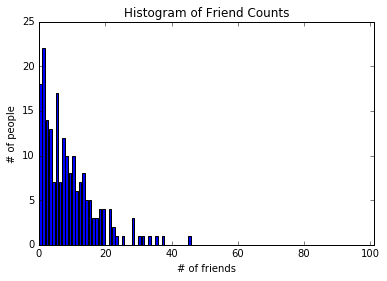

In [54]:
friend_counts = Counter([int(x) for x in num_friends])
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [55]:
num_points = len(num_friends)

largest_value = max(num_friends)
smallest_value = min(num_friends)

sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
second_smallest_value = sorted_values[1]
second_largest_value = sorted_values[-2]

In [71]:
print("number of points =", num_points)
print("largest value =", largest_value)
print("smallest value =", smallest_value)
print("second smallest value =", second_smallest_value)
print("second largest value =", second_largest_value)

number of points = 200
largest value = 45
smallest value = 0
second smallest value = 0
second largest value = 37


### Central Tendencies

In [72]:
def mean(x):
    return sum(x) / len(x)

print("mean =", mean(num_friends))

mean = 8.485


In [73]:
def median(v):
    """find the 'middle-most' value of v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2    # use integer division
    
    if n % 2 == 1:
        # if odd, return the middle value
        return sorted(v[midpoint])
    else:
        # if even, return the average of the middle values
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2
    
print("median =", median(num_friends))

median = 7.0


Computing the *median* requires sorting.

The *mean* is sensitive to outliers.

The *quantile* - the value less than which a certain percentile of the data lies - is a generalization of the median - the value less than which 50% of the data lies.

In [74]:
def quantile(x, p):
    """returns the p-th percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

print("10% quantile =", quantile(num_friends, 0.10))
print("25% quantile =", quantile(num_friends, 0.25))
print("50% quantile =", quantile(num_friends, 0.50), "(the median)")
print("75% quantile =", quantile(num_friends, 0.75))
print("90% quantile =", quantile(num_friends, 0.9))
      

10% quantile = 1
25% quantile = 2
50% quantile = 7 (the median)
75% quantile = 12
90% quantile = 19


In [75]:
def mode(x):
    """returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() # use counts.iteritems() in python 2
           if count == max_count]

print("mode =", mode(num_friends))

mode = [1]


### Dispersion

In [76]:
def data_range(x):
    return max(x) - min(x)

print("range =", data_range(num_friends))

range = 45


In [79]:
# From Chapter 4: Linear Algebra
def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i 
               for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

In [81]:
def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

print("variance =", variance(num_friends))

variance = 64.49223618090453


The variance is
$$\textrm{var} = v^2 / (n - 1),$$ 
where $\vec{v} = v_x\,\hat{x} + v_y\,\hat{y} + v_z\,\hat{z}$. This is because $v^2 / n$ has been multiplied by Bessel's correction $n / (n - 1)$ to correct for the biased estimator of population variance.

However, we generally use the standard deviation as the units are easier to interpret than those of variance (units^2).

In [84]:
def standard_deviation(x):
    return math.sqrt(variance(x))

print("standard deviation =", standard_deviation(num_friends))

standard deviation = 8.03070583329414


*Range* and *standard deviation*, like *mean*, are also sensitive to outliers.

The *interquartile range* is a more robust alternative:

In [86]:
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

print("interquartile range =", interquartile_range(num_friends))

interquartile range = 10


## Correlation
Hypothesis: The amount of time people spend on the site is related to the number of friends they have on the site.


In [1]:
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

In [ ]:
covariance(num_friends, daily_minutes)

The covariance can be hard to interpret, for a couple of reasons:
- Its units are the product of the inputs' units (e.g., friends-minutes-per-day), which can be hard to make sense of.
- If each user had twice as many friends (but the same number of minutes), the covariance would be twice as large.  But in a sense the variables would be just as interrelated.  Said differently, it's hard to say what counds as a "large" covariance.

For this reason, it's more common to look at the *correlation*, which divides out the standard deviations of both variables:

In [2]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0   # if no variation, correlation is zero

In [ ]:
correlation(num_friends, daily_minutes)

## Simpson's Paradox

## Some Other Correlational Caveats

## Correlation and Causation

## For Further Exploration
- `SciPy`, `pandas`, and `StatsModels`
- Statistics textbooks:
    - *OpenIntro Statistics*
    - *OpenStax Introductory Statistics*